In [1]:
#impporting all the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#loading the data set and reading the file
#two data sets are present 
test=pd.read_csv("Titanic_test.csv")
train=pd.read_csv("Titanic_train.csv")
train.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
#first combining both the train and test to perform EDA
#after we will fit the model
df=pd.concat([train,test],axis=0)#merging with rows
df.reset_index(drop=True,inplace=True)#resetting the index
df
#in survived column we see null values because we do not have that column in test
#simply we ignore them

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
df.shape

(1309, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


b. Examine the features, their types, and summary statistics.

In [9]:
df.select_dtypes('number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,NaN,0,0,8.0500
1305,1306,NaN,1,39.0,0,0,108.9000
1306,1307,NaN,3,38.5,0,0,7.2500
1307,1308,NaN,3,NaN,0,0,8.0500


In [10]:
df['Pclass'].unique()#tho it is numbers but behaving as descrete having 
                      #3 values like label encoding

array([3, 1, 2], dtype=int64)

In [11]:
df['SibSp'].unique()#same numeric but descrete because it say no of 
                      #siblings/spouses aboard at titinic

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [12]:
df['Parch'].unique()#same situation number of parents/childrens aboard ship

array([0, 1, 2, 5, 3, 4, 6, 9], dtype=int64)

In [13]:
#to get all statistical summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


c.Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.

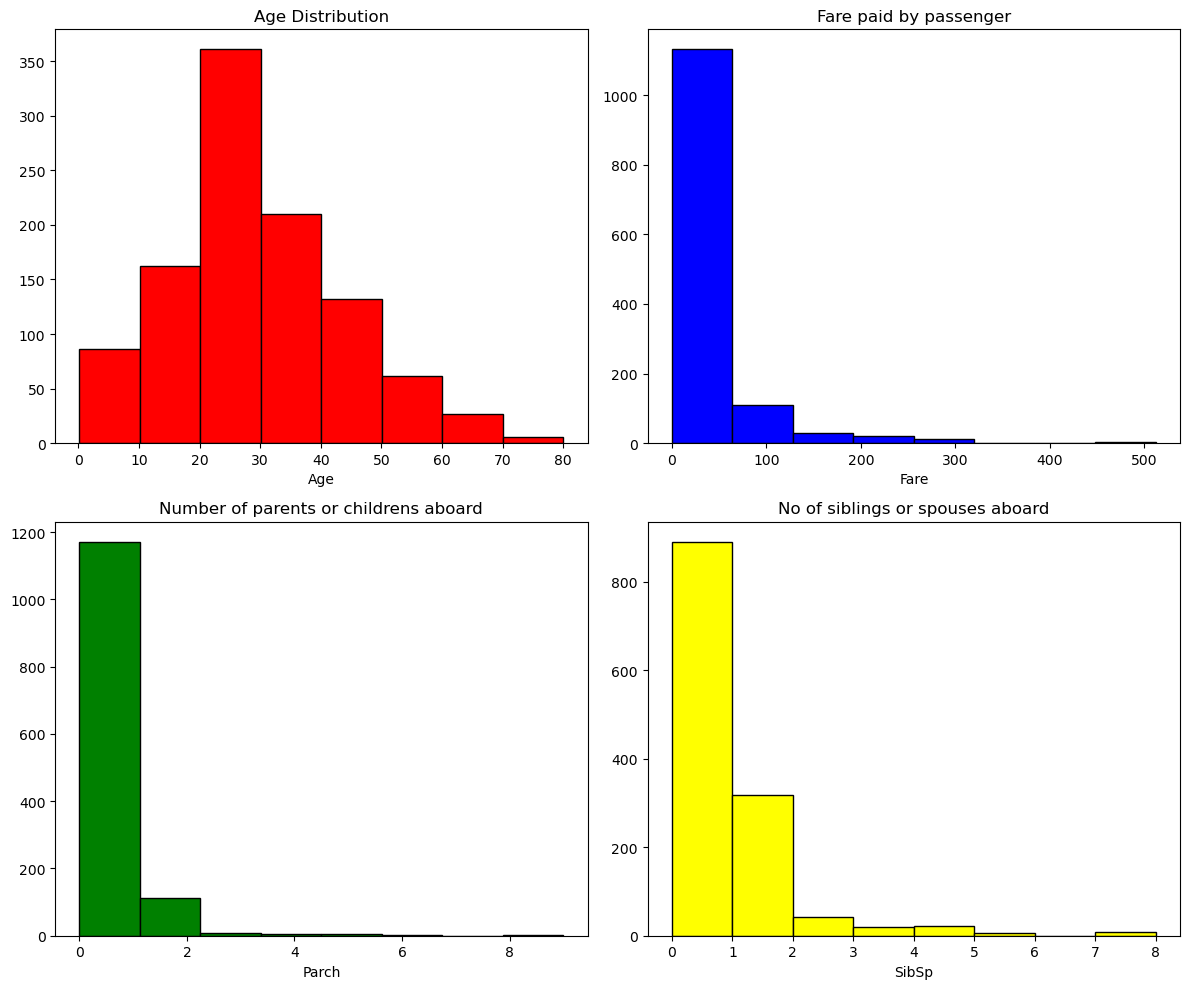

skewness for age is  0.40767455974362266
skewness for Fare is  4.367709134122922
skewness for Parch is  3.6690782036511136
skewness for SibSp is  3.844220342922907


In [15]:
#creating histograms
fig,axes=plt.subplots(2,2,figsize=(12,10))
#Histogram for age
axes[0,0].hist(df['Age'],bins=8,color='red',edgecolor='black')
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')

#Histogram for Fare
axes[0,1].hist(df['Fare'],bins=8,color='blue',edgecolor='black')
axes[0,1].set_title('Fare paid by passenger')
axes[0,1].set_xlabel('Fare')

#Histogram for Parch
axes[1,0].hist(df['Parch'],bins=8,color='green',edgecolor='black')
axes[1,0].set_title('Number of parents or childrens aboard')
axes[1,0].set_xlabel('Parch')

#Histogram for Sibsp
axes[1,1].hist(df['SibSp'],bins=8,color='yellow',edgecolor='black')
axes[1,1].set_title('No of siblings or spouses aboard')
axes[1,1].set_xlabel('SibSp')

#adjust plot
plt.tight_layout()
plt.show()

#print skewness 
print("skewness for age is ",df['Age'].skew())
print("skewness for Fare is ",df['Fare'].skew())
print("skewness for Parch is ",df['Parch'].skew())
print("skewness for SibSp is ",df['SibSp'].skew())

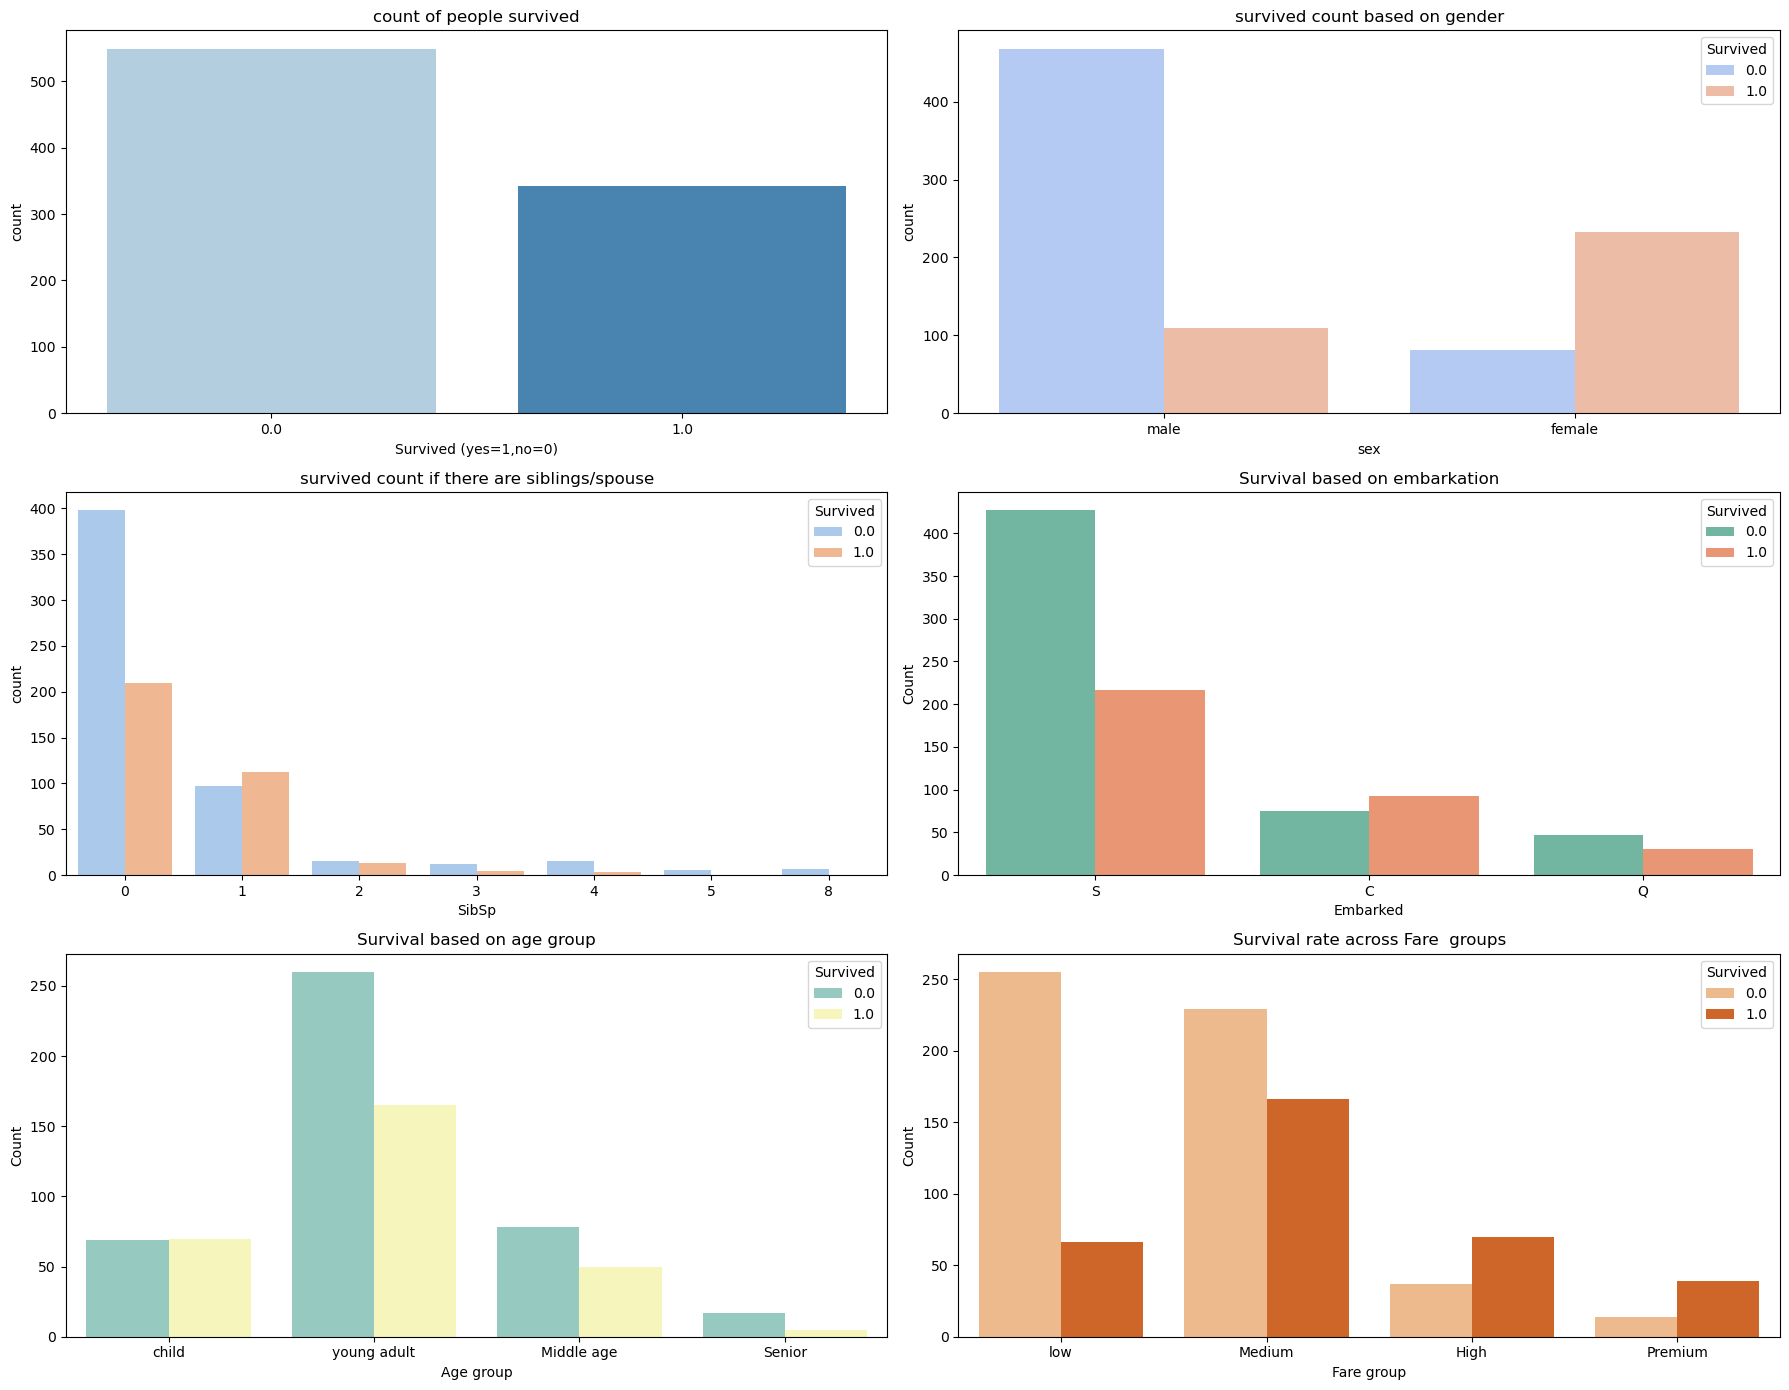


Skewness of SibSp: 3.844220342922907
Skewness of Pclass: -0.5986471102804279
Skewness of Fare: 4.367709134122922


In [16]:
#creating a layout dashboard
fig,axes=plt.subplots(3,2,figsize=(18,14))
#survival count
sns.barplot(x=df['Survived'].value_counts().index,y=df['Survived'].value_counts(),ax=axes[0,0],palette='Blues')
axes[0,0].set_title('count of people survived')
axes[0,0].set_xlabel('Survived (yes=1,no=0)')
axes[0,0].set_ylabel('count')

#Gender based survival
sns.countplot(x='Sex',hue='Survived',data=df,ax=axes[0,1],palette='coolwarm')
axes[0,1].set_title('survived count based on gender')
axes[0,1].set_xlabel('sex')
axes[0,1].set_ylabel('count')

#survival based on if siblings or spouse is present
sns.countplot(x='SibSp',hue='Survived',data=df,ax=axes[1,0],palette='pastel')
axes[1,0].set_title('survived count if there are siblings/spouse')
axes[1,0].set_xlabel('SibSp')
axes[1,0].set_ylabel('count')

#survival based on Embarkation
sns.countplot(x="Embarked",hue='Survived',data=df,ax=axes[1,1],palette='Set2')
axes[1,1].set_title("Survival based on embarkation")
axes[1,1].set_xlabel("Embarked")
axes[1,1].set_ylabel('Count')

#survival of age groups
df["Age_group"]=pd.cut(df['Age'],bins=[0,18,40,60,80],labels=['child','young adult','Middle age','Senior'])
sns.countplot(x='Age_group',hue='Survived',data=df,ax=axes[2,0],palette='Set3')
axes[2,0].set_title("Survival based on age group")
axes[2,0].set_xlabel("Age group")
axes[2,0].set_ylabel('Count')

#Fare category analysis
df['Fare_group']=pd.cut(df['Fare'],bins=[0,10,50,100,600],labels=["low","Medium","High","Premium"])
sns.countplot(x='Fare_group',hue='Survived',data=df,ax=axes[2,1],palette='Oranges')
axes[2,1].set_title("Survival rate across Fare  groups")
axes[2,1].set_xlabel("Fare group")
axes[2,1].set_ylabel('Count')

plt.tight_layout()
plt.show()

print("\nSkewness of SibSp:", df["SibSp"].skew())  # Right skewed
print("Skewness of Pclass:", df["Pclass"].skew())  # Right skewed
print("Skewness of Fare:", df["Fare"].skew())  # Right skewed

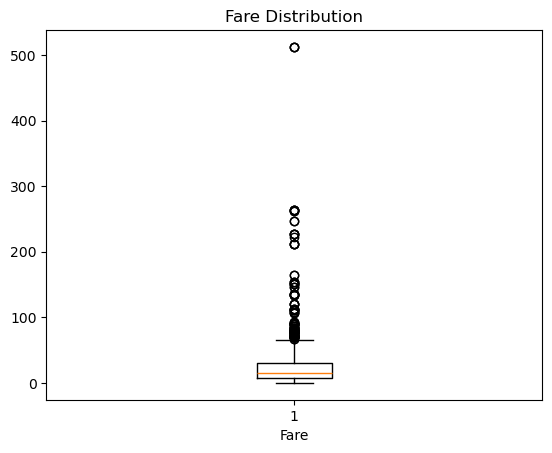

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# Boxplot for Fare

plt.boxplot(train['Fare'])
plt.xlabel("Fare")
plt.title("Fare Distribution")
plt.show()

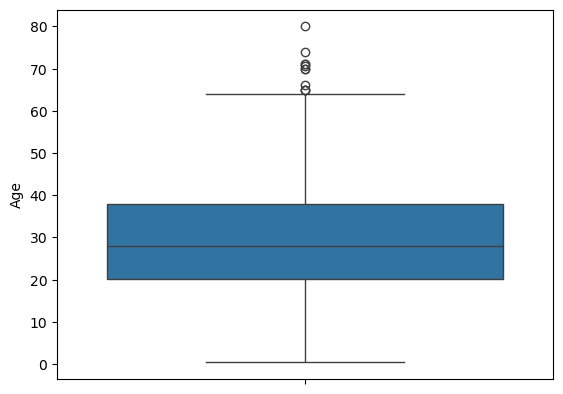

In [18]:
#boxplot for age
sns.boxplot(train.Age)
plt.show()

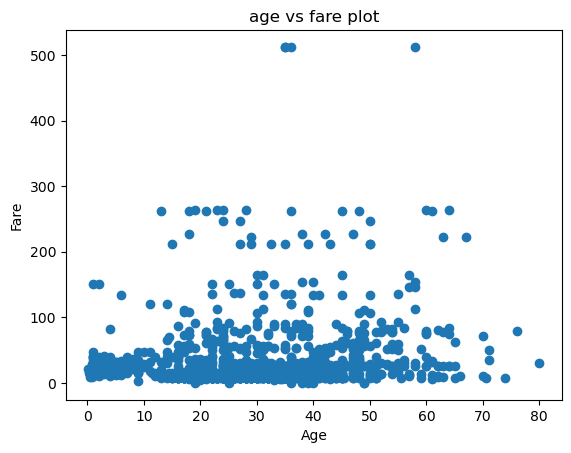

In [19]:
plt.scatter(x=df['Age'],y=df['Fare'])
plt.title('age vs fare plot')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [20]:
df['Age'].corr(df['Fare'])

0.17873985599964118

2. Data Preprocessing:
a. Handle missing values (e.g., imputation)

In [22]:
train.shape

(891, 12)

In [23]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
#we can see in the above there are 3 null columns in the data
#checking which is suitable for imputation
train['Age'].mean()
print('the mean is',train['Age'].mean())
train['Age'].median()
print("the median is",train['Age'].median())

the mean is 29.69911764705882
the median is 28.0


In [25]:
#we are filling the null values by the mean
train['Age'].fillna(train['Age'].mean(),inplace=True)

In [26]:
train['Age'].isnull().sum()

0

In [27]:
#Finding the null value count in the cabin column
train["Cabin"].isnull().sum()

687

In [28]:
#finding the best imputation or the cabin column
#as the the cabin column is categorical mode can only be used as imputation
train["Cabin"].fillna('Unknown',inplace=True)

In [29]:
train["Cabin"].isnull().sum()

0

In [30]:
#we can see there are only two null values in the Embarked column so drop them
train=train.dropna(subset=["Embarked"])

In [31]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [32]:
#checking the null values in the test data set
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [33]:
#we have 86 null values for age column
test['Age'].mean()
print('the mean is',test['Age'].mean())
test['Age'].median()
print("the median is",test['Age'].median())

the mean is 30.272590361445783
the median is 27.0


In [34]:
#replace the age column null values with mean
test['Age'].fillna(test['Age'].mean(),inplace=True)

In [35]:
test["Cabin"].isnull().sum()

327

In [36]:
test["Cabin"].fillna('Unknown',inplace=True)
test.groupby('Ticket')['Cabin'].agg(lambda x: x.mode().iloc[0]) #from data we can observe that Cabin will de pendending on ticket/Pcalss so we
#will fing the pattern between them because we are getting multimodel data


Ticket
110469            C106
110489             D22
110813             D37
111163         Unknown
112051         Unknown
                ...   
W./C. 14260    Unknown
W./C. 14266        F33
W./C. 6607     Unknown
W./C. 6608     Unknown
W.E.P. 5734        E31
Name: Cabin, Length: 363, dtype: object

In [37]:
test['Cabin'] = test.groupby('Pclass')['Cabin'].transform(lambda x: x.fillna(x.mode()[0]))

In [38]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [39]:
#for fare column we only have one missing value so drop that value
test=test.dropna(subset=['Fare'])

In [40]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

b. Encode categorical variables.

In [42]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [84]:
#we are performing the label Encoding on the categorical data

from sklearn.preprocessing import LabelEncoder  
label=LabelEncoder()       #storing the function in a instance

lab1=label.fit_transform(train['Embarked'])   #transforming the data
lab1=pd.DataFrame(lab1)                         #Creating the data frame
lab1.columns=["Embarked"]                       #giving the name for the column

#for test data
labt=label.fit_transform(test['Embarked'])
labt=pd.DataFrame(labt)
labt.columns=["Embarked"] 

#for train data sex column

lab2=label.fit_transform(train['Sex'])
lab2=pd.DataFrame(lab2)
lab2.columns=['Sex']



#for test data sex column

lab2t=label.fit_transform(test['Sex'])
lab2t=pd.DataFrame(lab2t)
lab2t.columns=['Sex']

In [86]:
labeltrain=pd.concat([lab1,lab2],axis=1)
labeltrain

,Embarked,Sex
0,2,1
1,0,0
2,2,0
3,2,0
4,2,1
...,...,...
884,2,1
885,2,0
886,2,0
887,0,1


In [88]:
labeltest=pd.concat([labt,lab2t],axis=1)
labeltest

,Embarked,Sex
0,1,1
1,2,0
2,1,1
3,2,1
4,2,0
...,...,...
412,2,1
413,0,0
414,2,1
415,2,1


In [90]:
#Colums to be Standardize or Normalize

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scale=scaler.fit_transform(train[['Age','Fare']])
scale=pd.DataFrame(scale)
scale.columns=['Age','Fare']


#for test data 

scaler=MinMaxScaler()

scalet=scaler.fit_transform(test[['Age','Fare']])
scalet=pd.DataFrame(scalet)
scalet.columns=['Age','Fare']

scale

,Age,Fare
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713
...,...,...
884,0.334004,0.025374
885,0.233476,0.058556
886,0.367921,0.045771
887,0.321438,0.058556


In [92]:
#merging the all transformed columns in a single dataset

#train

df3=train[['SibSp','Parch','Pclass','Survived']]

df_train=pd.concat([scale,labeltrain,df3],axis=1)

df_train.dropna(inplace=True)  #checks for any null values and drop them
df_train.isnull().sum()

df_train

,Age,Fare,Embarked,Sex,SibSp,Parch,Pclass,Survived
0,0.271174,0.014151,2.0,1.0,1.0,0.0,3.0,0.0
1,0.472229,0.139136,0.0,0.0,1.0,0.0,1.0,1.0
2,0.321438,0.015469,2.0,0.0,0.0,0.0,3.0,1.0
3,0.434531,0.103644,2.0,0.0,1.0,0.0,1.0,1.0
4,0.434531,0.015713,2.0,1.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...
884,0.334004,0.025374,2.0,1.0,0.0,0.0,3.0,0.0
885,0.233476,0.058556,2.0,0.0,0.0,5.0,3.0,0.0
886,0.367921,0.045771,2.0,0.0,0.0,0.0,2.0,0.0
887,0.321438,0.058556,0.0,1.0,0.0,0.0,1.0,1.0


In [94]:
#merging all  the test dataset after data transformation

df2=test[['SibSp','Pclass','Parch']]

df_test=pd.concat([scalet,labeltest,df2],axis=1,ignore_index=True)

df_test.columns=['Age','Fare','Embarked','Sex','SibSp','Parch','Pclass']

df_test

,Age,Fare,Embarked,Sex,SibSp,Parch,Pclass
0,0.452723,0.015282,1.0,1.0,0.0,3.0,0.0
1,0.617566,0.013663,2.0,0.0,1.0,3.0,0.0
2,0.815377,0.018909,1.0,1.0,0.0,2.0,0.0
3,0.353818,0.016908,2.0,1.0,0.0,3.0,0.0
4,0.287881,0.023984,2.0,0.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...
413,0.512066,0.212559,0.0,0.0,0.0,3.0,0.0
414,0.505473,0.014151,2.0,1.0,0.0,1.0,0.0
415,0.396975,0.015713,2.0,1.0,0.0,3.0,0.0
416,0.396975,0.043640,0.0,1.0,0.0,3.0,0.0


In [96]:
df_test.isna().sum()

Age         1
Fare        1
Embarked    1
Sex         1
SibSp       1
Parch       1
Pclass      1
dtype: int64

In [98]:
df_test.dropna(inplace=True)

In [100]:
df_test.isna().sum()

Age         0
Fare        0
Embarked    0
Sex         0
SibSp       0
Parch       0
Pclass      0
dtype: int64

3. Model Building:
a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

b. Train the model using the training data.

In [103]:
#in this problem the data is already partation into train and test so we
#are not splitting the data into train and test and we are fiiting the 
#model on train data and test on test data
x=df_train.iloc[:,:7]  #independent variables using only pandas iloc func
y=df_train['Survived']  #Dependent variable

In [105]:
from sklearn.linear_model import LogisticRegression  #import the model 

model=LogisticRegression()     #creating a instance

log=model.fit(x,y)             #fitting the model

y_pred=model.predict(x)        #predicting on x data



y_pred_train=pd.DataFrame(y_pred,columns=['y_pred'])  #craeting a dataframe

In [107]:
df_train.reset_index(drop=True, inplace=True)      #resetting the index because it may gets suffed
y_pred_train.reset_index(drop=True, inplace=True)
df_train1= pd.concat([df_train, y_pred_train], axis=1)  #concating both pred and train data to see difference
df_train1

,Age,Fare,Embarked,Sex,SibSp,Parch,Pclass,Survived,y_pred
0,0.271174,0.014151,2.0,1.0,1.0,0.0,3.0,0.0,0.0
1,0.472229,0.139136,0.0,0.0,1.0,0.0,1.0,1.0,1.0
2,0.321438,0.015469,2.0,0.0,0.0,0.0,3.0,1.0,0.0
3,0.434531,0.103644,2.0,0.0,1.0,0.0,1.0,1.0,1.0
4,0.434531,0.015713,2.0,1.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
882,0.334004,0.025374,2.0,1.0,0.0,0.0,3.0,0.0,0.0
883,0.233476,0.058556,2.0,0.0,0.0,5.0,3.0,0.0,1.0
884,0.367921,0.045771,2.0,0.0,0.0,0.0,2.0,0.0,0.0
885,0.321438,0.058556,0.0,1.0,0.0,0.0,1.0,1.0,1.0


In [109]:
prob=model.predict_proba(x)

prob=prob.ravel()
prob

array([0.784895  , 0.215105  , 0.38921681, ..., 0.61973448, 0.66155553,
       0.33844447])

In [111]:
#creating a column in table to see the predicted probability 


df_train1['predicted_prob']=pd.DataFrame(prob)

df_train1

,Age,Fare,Embarked,Sex,SibSp,Parch,Pclass,Survived,y_pred,predicted_prob
0,0.271174,0.014151,2.0,1.0,1.0,0.0,3.0,0.0,0.0,0.784895
1,0.472229,0.139136,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.215105
2,0.321438,0.015469,2.0,0.0,0.0,0.0,3.0,1.0,0.0,0.389217
3,0.434531,0.103644,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.610783
4,0.434531,0.015713,2.0,1.0,0.0,0.0,3.0,0.0,0.0,0.750091
...,...,...,...,...,...,...,...,...,...,...
882,0.334004,0.025374,2.0,1.0,0.0,0.0,3.0,0.0,0.0,0.770123
883,0.233476,0.058556,2.0,0.0,0.0,5.0,3.0,0.0,1.0,0.229877
884,0.367921,0.045771,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.586431
885,0.321438,0.058556,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.413569


In [113]:
x2=df_test.iloc[:,:]            #for total test dataset
y_test_pred=model.predict(x2)   #predicting on x data

y_test_pred=pd.DataFrame(y_test_pred,columns=['y_test_pred'])   #creating a dataframe

y_test_pred.value_counts()

y_test_pred
1.0            400
0.0             16
Name: count, dtype: int64

cross validation

In [115]:

#apply the cross validation using kfold

from sklearn.model_selection import cross_val_score,KFold

model=LogisticRegression()

kfold=KFold(n_splits=5,shuffle=True,random_state=37)  #splits the hole datset into 5 parts

scores=cross_val_score(model,x,y,cv=kfold,scoring='accuracy')

print("cross-validation-score:",scores)
print("mean accuracy        :",scores.mean()*100)

cross-validation-score: [0.65168539 0.71348315 0.74011299 0.6779661  0.65536723]
mean accuracy        : 68.77229734018917


In [117]:
#it will repeat more/multiple times for more stable evaluation

from sklearn.model_selection import RepeatedKFold

# Perform Repeated K-Fold Cross-Validation (e.g., 5 folds, repeated 3 times)
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=37)
scores = cross_val_score(model, x, y, cv=rkf, scoring='accuracy')

print("Repeated K-Fold CV Scores:", scores)
print()
print("Mean Accuracy:", scores.mean()*100)

Repeated K-Fold CV Scores: [0.65168539 0.71348315 0.74011299 0.6779661  0.65536723 0.69662921
 0.65730337 0.74011299 0.69491525 0.65536723 0.64044944 0.69662921
 0.62711864 0.75141243 0.71186441]

Mean Accuracy: 68.73611375610994


In [119]:
#{"suffile splitscross validation"} randomly splits the data into train/test
#multiple times without fixed folds it is also knows as monte carlo cv


from sklearn.model_selection import ShuffleSplit

suffle=ShuffleSplit(n_splits=10,test_size=0.20,random_state=37)
scores=cross_val_score(model,x,y,cv=suffle,scoring='accuracy')

print("shuffle split cv score",scores)
print()
print("mean accuracy",scores.mean())

shuffle split cv score [0.65168539 0.69662921 0.64044944 0.73033708 0.67977528 0.66853933
 0.69101124 0.68539326 0.70786517 0.65168539]

mean accuracy 0.6803370786516854


4. Model Evaluation:
a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score. Visualize the ROC curve

In [122]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,confusion_matrix


accuracy = accuracy_score(y, y_pred_train)
precision = precision_score(y, y_pred_train)
recall = recall_score(y, y_pred_train)
f1 = f1_score(y, y_pred_train)


# Display results
print(f"Accuracy  : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall    : {recall:.2f}")
print(f"F1 Score  : {f1:.2f}")
print()
print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred_train))

Accuracy  : 0.69
Precision : 0.63
Recall    : 0.44
F1 Score  : 0.52


Confusion Matrix:
[[459  89]
 [189 150]]


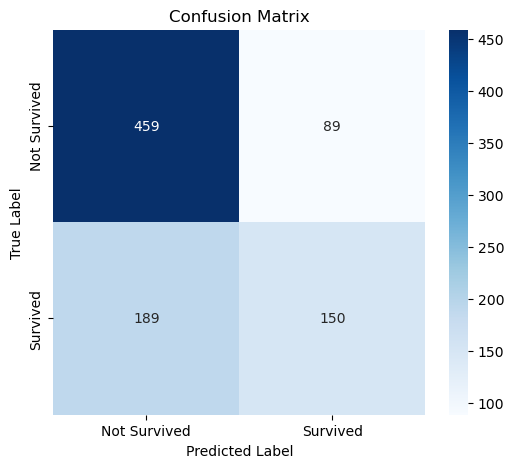

In [124]:
#visualization for confusion matrix


# Compute confusion matrix
cm = confusion_matrix(y, y_pred_train)

# Define class labels
labels = ['Not Survived', 'Survived']

# Create heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

false positive rate      : [0.         0.16240876 1.        ]
true positive rate       : [0.         0.44247788 1.        ]
decision threshold values: [inf  1.  0.]


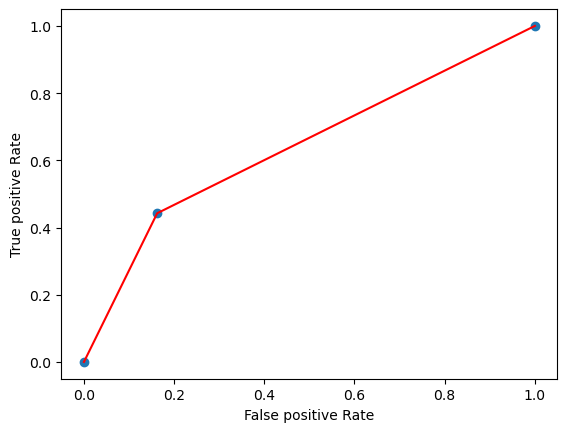

area  under curve 64.003


In [136]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr,tpr,dummy=roc_curve(y,df_train1['y_pred'])

print("false positive rate      :",fpr)  #type 1 error

print("true positive rate       :",tpr)   #recall

print("decision threshold values:",dummy) 


plt.scatter(x=fpr,y=tpr)
plt.plot(fpr,tpr,color='red')
plt.ylabel("True positive Rate")
plt.xlabel("False positive Rate")
plt.show()

auc=roc_auc_score(y,df_train1['y_pred'])
print("area  under curve",(auc*100).round(3))

false positive rate      : [0.         0.16240876 1.        ]
true positive rate       : [0.         0.44247788 1.        ]
decision threshold values: [inf  1.  0.]


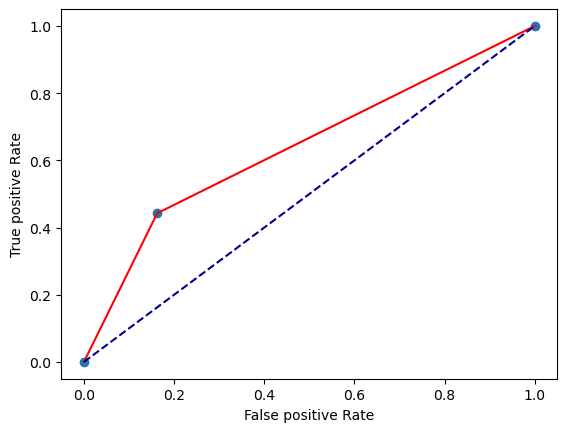

area  under curve 64.003


In [138]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr,tpr,dummy=roc_curve(y,df_train1['y_pred'])

print("false positive rate      :",fpr)  #type 1 error

print("true positive rate       :",tpr)   #recall

print("decision threshold values:",dummy)


plt.scatter(x=fpr,y=tpr)
plt.plot(fpr, tpr, color='red', label=f"AUC={(roc_auc_score(y, df_train1['y_pred']) * 100).round(3)}")  

plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel("True positive Rate")
plt.xlabel("False positive Rate")
plt.show()

auc=roc_auc_score(y,df_train1['y_pred'])
print("area  under curve",(auc*100).round(3))

In [140]:
#calculating the log loss:-metrics used to calculate performance of classification
#model it is calculated by apply formula logloss/in simple terms it is error

from sklearn.metrics import log_loss
loss = log_loss(y,y_pred)
print("loss :", np.round(loss,3))

loss : 11.297


In [142]:
#from above result we can say the model is not performing well.So we can say
#that the models predicted probability are significantly different from actual 
#labels

In [144]:
df_train1

,Age,Fare,Embarked,Sex,SibSp,Parch,Pclass,Survived,y_pred,predicted_prob
0,0.271174,0.014151,2.0,1.0,1.0,0.0,3.0,0.0,0.0,0.784895
1,0.472229,0.139136,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.215105
2,0.321438,0.015469,2.0,0.0,0.0,0.0,3.0,1.0,0.0,0.389217
3,0.434531,0.103644,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.610783
4,0.434531,0.015713,2.0,1.0,0.0,0.0,3.0,0.0,0.0,0.750091
...,...,...,...,...,...,...,...,...,...,...
882,0.334004,0.025374,2.0,1.0,0.0,0.0,3.0,0.0,0.0,0.770123
883,0.233476,0.058556,2.0,0.0,0.0,5.0,3.0,0.0,1.0,0.229877
884,0.367921,0.045771,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.586431
885,0.321438,0.058556,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.413569


In [146]:
#for which threshold value model is perfroming well

results=[]
thresholds=np.arange(0.3,0.7,0.01)

for threshold in thresholds:
    y_pred1=(df_train1['predicted_prob']>threshold).astype(int)
    accuracy=accuracy_score(y,y_pred1)
    results.append([threshold,accuracy])
    
results 
#from the below results we can see if we change the threshold value/cutoff 
#value we can a slight improvement in the model so we select one threshold value

[[0.3, 0.4813979706877114],
 [0.31, 0.4813979706877114],
 [0.32, 0.48252536640360766],
 [0.33, 0.4836527621195039],
 [0.34, 0.4836527621195039],
 [0.35000000000000003, 0.48478015783540024],
 [0.36000000000000004, 0.48478015783540024],
 [0.37000000000000005, 0.4836527621195039],
 [0.38000000000000006, 0.4813979706877114],
 [0.39000000000000007, 0.48703494926719276],
 [0.4000000000000001, 0.4926719278466742],
 [0.4100000000000001, 0.4926719278466742],
 [0.4200000000000001, 0.4983089064261556],
 [0.4300000000000001, 0.5016910935738444],
 [0.4400000000000001, 0.5084554678692221],
 [0.4500000000000001, 0.5107102593010147],
 [0.46000000000000013, 0.5118376550169109],
 [0.47000000000000014, 0.5140924464487034],
 [0.48000000000000015, 0.5140924464487034],
 [0.49000000000000016, 0.5163472378804961],
 [0.5000000000000002, 0.5163472378804961],
 [0.5100000000000002, 0.5163472378804961],
 [0.5200000000000002, 0.5186020293122886],
 [0.5300000000000002, 0.5186020293122886],
 [0.5400000000000003, 0.51

In [150]:
#from above results we can see 4.6 is having maximum accuracy

dft=pd.DataFrame(df_train1['predicted_prob']>0.46)

In [152]:
dft.value_counts(df_train1['predicted_prob']>0.46)  #checking using function

predicted_prob
True     456
False    431
Name: count, dtype: int64

In [154]:
y_pred1=[]                        #creating a array and storing the results
for i in dft['predicted_prob']:
    if i>0.4:
        y_pred1.append(1)
    else:
        y_pred1.append(0)
        
y_pred1=pd.DataFrame(y_pred1,columns=['y_pred1'])
y_pred1                                         #creating a data frame 

,y_pred1
0,1
1,0
2,0
3,1
4,1
...,...
882,1
883,0
884,1
885,0


In [156]:
df_train2=pd.concat([df_train1,y_pred1],axis=1)  #concatinating the results

df_train2

,Age,Fare,Embarked,Sex,SibSp,Parch,Pclass,Survived,y_pred,predicted_prob,y_pred1
0,0.271174,0.014151,2.0,1.0,1.0,0.0,3.0,0.0,0.0,0.784895,1
1,0.472229,0.139136,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.215105,0
2,0.321438,0.015469,2.0,0.0,0.0,0.0,3.0,1.0,0.0,0.389217,0
3,0.434531,0.103644,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.610783,1
4,0.434531,0.015713,2.0,1.0,0.0,0.0,3.0,0.0,0.0,0.750091,1
...,...,...,...,...,...,...,...,...,...,...,...
882,0.334004,0.025374,2.0,1.0,0.0,0.0,3.0,0.0,0.0,0.770123,1
883,0.233476,0.058556,2.0,0.0,0.0,5.0,3.0,0.0,1.0,0.229877,0
884,0.367921,0.045771,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.586431,1
885,0.321438,0.058556,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.413569,0


accuracy_score(y,y_pred1)   # checking accuracy 

In [160]:
#y_prob=pd.DataFrame(df_train1['predicted_prob'])  no need if we get error we can use thsi

In [162]:
#creating a roc_auc curve with the predicted probability values 

fpr,tpr,dummy=roc_curve(y,df_train1['predicted_prob'])

plt.scatter(x=fpr,y=tpr)
plt.plot(fpr,tpr,color='black',label='"Roc_Curve"')

auc_score=roc_auc_score(y,df_train1['predicted_prob'])
print("area under curve:",auc_score*100)

area under curve: 53.78716921818143


5. Interpretation:
a. Interpret the coefficients of the logistic regression model.

b. Discuss the significance of features in predicting the target variable (survival probability in this case).

In [167]:
model = LogisticRegression()
model.fit(x,y)  #the model is trained
print(model.coef_)  
model.coef_[0]


[[ 0.04363973 -0.26100187 -0.0089211  -0.08505572 -0.1084207   0.30501981
  -0.83298923]]


array([ 0.04363973, -0.26100187, -0.0089211 , -0.08505572, -0.1084207 ,
        0.30501981, -0.83298923])

In [169]:
df_train1.columns

Index(['Age', 'Fare', 'Embarked', 'Sex', 'SibSp', 'Parch', 'Pclass',
       'Survived', 'y_pred', 'predicted_prob'],
      dtype='object')

In [171]:
df_train1.columns

Index(['Age', 'Fare', 'Embarked', 'Sex', 'SibSp', 'Parch', 'Pclass',
       'Survived', 'y_pred', 'predicted_prob'],
      dtype='object')

b. Discuss the significance of features in predicting the target variable (survival probability in this case).

In [174]:
import statsmodels.api as sm

X = df_train1.drop(columns=['Survived'])  # Independent variables
y = df_train1['Survived']  # Dependent variable

#X = sm.add_constant(X)  # Adding intercept so that model has a bias term
                       #the intercept ensures that B0 is present in equation
         
logit_model = sm.Logit(y, X) #fits a logisticregression model using statsmodel
                             #it uses logit function/formla for calculation

result = logit_model.fit()  #fits the model to data using MLE(maximum 
                                        #likehood estimator)


print(result.summary())  # View p-values and significance of each feature

Optimization terminated successfully.
         Current function value: 0.604566
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  887
Model:                          Logit   Df Residuals:                      878
Method:                           MLE   Df Model:                            8
Date:                Thu, 15 May 2025   Pseudo R-squ.:                 0.09105
Time:                        22:22:33   Log-Likelihood:                -536.25
converged:                       True   LL-Null:                       -589.97
Covariance Type:            nonrobust   LLR p-value:                 1.283e-19
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Age                0.2812      0.444      0.634      0.526      -0.589       1.151
Fare             

In [176]:
result.predict(X)

0      0.276675
1      0.531890
2      0.240184
3      0.634228
4      0.299638
         ...   
882    0.296855
883    0.598934
884    0.395810
885    0.582240
886    0.381679
Length: 887, dtype: float64